In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [36]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [37]:
df.isna().sum() 

cgpa       0
package    0
dtype: int64

C:\Users\abhinav.aggarwal\AppData\Local\Temp\ipykernel_17636\2223288037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\abhinav.aggarwal\AppData\Local\Temp\ipykernel_17636\2223288037.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['package'])


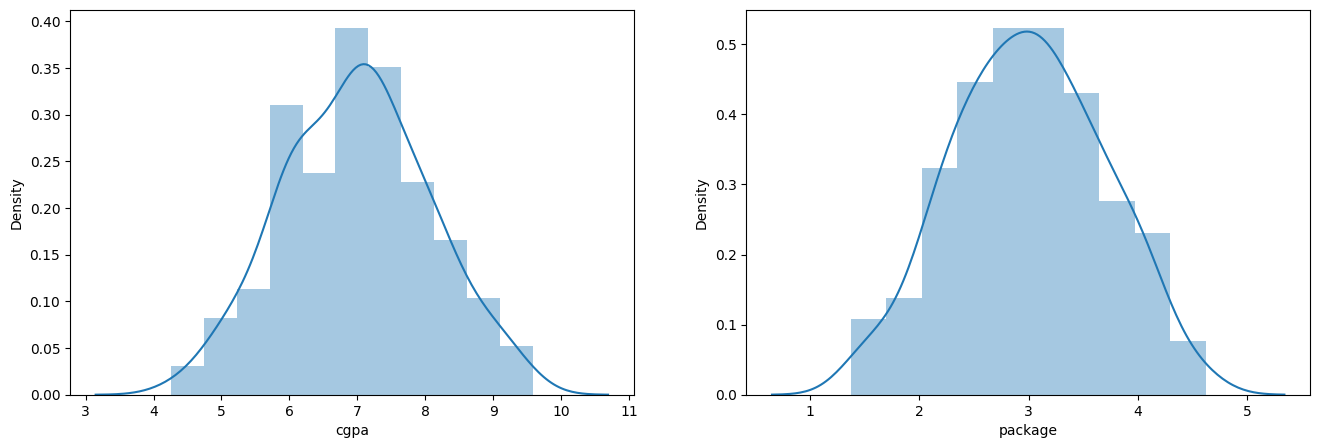

In [38]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['package'])

plt.show()
## They both are normal

In [39]:
x = df['cgpa']
df['cgpa_zscore'] = (x - x.mean())/x.std()

In [40]:
x = df['package']
df['package_zscore'] = (x - x.mean())/x.std()

In [41]:
df.head()

,cgpa,package,cgpa_zscore,package_zscore
0,6.89,3.26,-0.093977,0.381627
1,5.12,1.98,-1.749097,-1.469036
2,7.82,3.25,0.775662,0.367169
3,7.42,3.67,0.401624,0.974417
4,6.94,3.57,-0.047222,0.829834


In [42]:
df[ ((df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)) ]

,cgpa,package,cgpa_zscore,package_zscore


In [43]:
df[((df['package_zscore'] > 3) | (df['package_zscore'] < -3)) ]
## No Outliers in the data
## So dropping zscore columns
df.drop(columns=['cgpa_zscore','package_zscore'], inplace=True)

In [44]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'Package(in lpa)')

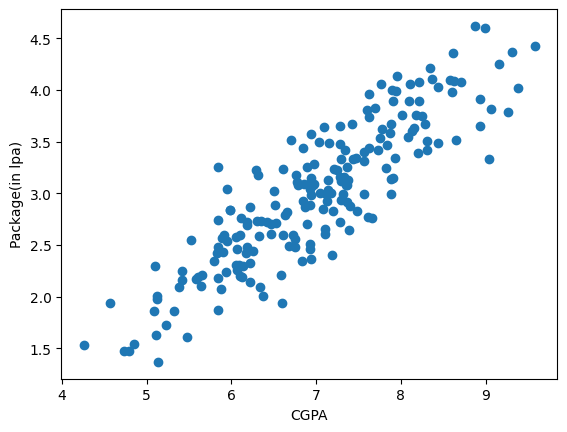

In [45]:
## Now making a scatter plot
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [46]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]
print(x)
print(y)


     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]
0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle= True)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

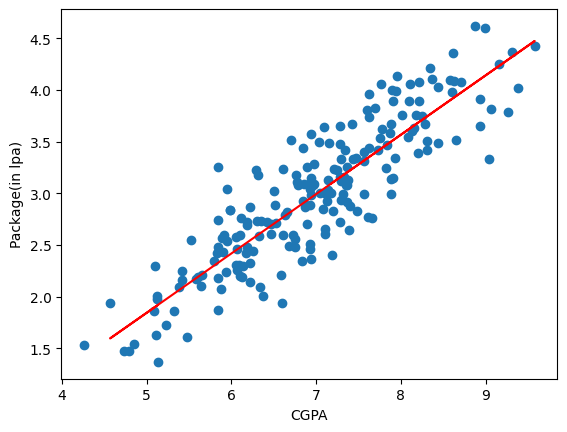

In [51]:
## Plotting of linear regression
plt.scatter(df['cgpa'], df['package'])
plt.plot(x_train, lr.predict(x_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [52]:
# Linear regression in the form of y = mx + c
coeff = lr.coef_
intercept = lr.intercept_
print(coeff, "\n",intercept)

[0.57425647] 
 -1.0270069374542108


In [53]:
lr.predict([x_test.iloc[0]])
# So it takes input a 2d array --> This is important

c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.78031348])

## Regression Metrics

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

In [55]:
y_pred = lr.predict(x_test)
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [56]:
outDf = pd.DataFrame({'Predicted Package': y_pred, 'Actual Package' : y_test })
outDf

,Predicted Package,Actual Package
95,2.780313,2.79
15,3.136352,3.23
30,3.199521,3.26
158,2.389819,3.04
128,3.526847,3.34
115,3.768035,4.21
69,3.165065,2.94
170,2.544868,2.87
174,3.176550,2.99
45,3.492392,3.58


In [57]:
print("The Mean absolute error is: ", mean_absolute_error(y_test, y_pred))

The Mean absolute error is:  0.23150985393278373


In [58]:
print("The Mean squared error is: ", mean_squared_error(y_test, y_pred))

The Mean squared error is:  0.08417638361329656


In [59]:
print("The Root Mean squared error is: ", root_mean_squared_error(y_test, y_pred))

The Root Mean squared error is:  0.2901316659954521


In [60]:
print("The R2 score is: ", r2_score(y_test, y_pred))

The R2 score is:  0.7730984312051673
